In [ ]:
#importing the necesssary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#downloading the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 65.4MB/s]


In [ ]:
df=pd.read_csv("/content/walmart_data.csv?1641285094")

#1) Defining Problem Statement and Analyzing basic metrics

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? 

Exploration of the dataset to analyze the basic metrics

#1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
print("No : of Records:",df.shape[0])
print("No : of Features:",df.shape[1])

No : of Records: 550068
No : of Features: 10


The dataset consist of 550068 records and 10 features/columns

In [ ]:
#FINDING THE DATATYPES AND OTHER INFO ABOUT THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Checking out the unique values in the dataset
df.nunique()
     

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
#Checking whether there is any null values in the dataset
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in the dataset

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#1.2 Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
df['User_ID'].nunique()

5891

The data set consist of 5891 different users

In [ ]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
df['Product_ID'].nunique()

3631

The dataset consist of 3631 different products.

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

The data consist of repetative purchases made by male customers=414259

The data consist of repetative purchases made by female customers=135809

In [ ]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

Out of 5891 users :

No : of Males=4225

No : of Females=1666


In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

The age of the customers are available in the following categories:

'0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'

In [ ]:
df['Age'].nunique()

7

The age is available in 7 categories

In [ ]:
#finding out the number of users in each age category

df.groupby('Age')['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

Maximum number of customers are in the age group 26-35 and minimum are in the age group of 0-17

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

The above analysis no of repetative purchases(total purchases) made by people of different occupation

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

The occupation of customers are available in the following categories:

{10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
5, 14, 13,  6}

In [ ]:
df['Occupation'].nunique()

21

The number of occupation categories:21

In [ ]:
#Finding the no : of users in each occupation

df.groupby('Occupation')['User_ID'].nunique()

Occupation
0     688
1     517
2     256
3     170
4     740
5     111
6     228
7     669
8      17
9      88
10    192
11    128
12    376
13    140
14    294
15    140
16    235
17    491
18     67
19     71
20    273
Name: User_ID, dtype: int64

the maximum no:of customers are of occupation 4 and minimum no:of customers are of occupation 8

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

The total no of purchases in each city category are

A  -  147720

B  -  231173

C  -  171175

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

The city category are of three types 'A', 'C', 'B' 

In [ ]:
df['City_Category'].nunique()

3

In [ ]:
#Finding the no of users in each city category

df.groupby('City_Category')['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

Most no: of users are from city C and least from A

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

The total no:of purchases made by customers and the years for which they stay at the same city is given above

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

The years for which the customers remain in the same city are '2', '4+', '3', '1', '0

In [ ]:
df['Stay_In_Current_City_Years'].nunique()

5

In [ ]:
#finding the no:of customers and the years for which they stay in the current city are
df.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

The total no:of purchases made by customers of Marital_Status 0=324731

The total no:of purchases made by customers of Marital_Status 1=225337

In [ ]:
df['Marital_Status'].unique()

array([0, 1])

The marital status of users are 0 and 1

In [ ]:
#finding the no: of customers of different maritial status

df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

There are 3417 customers of marital status 0 and 2474 customers of marital status 1

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

The total no:of purchases of each product category are given above.

In [ ]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

The different product categories are 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,9, 20, 19

In [ ]:
df['Product_Category'].nunique()

20

In [ ]:
#finding no of products of each product category

df.groupby('Product_Category')['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

In [ ]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [ ]:
df['Purchase'].nunique()

18105

#1.3 Visual Analysis - Univariate & Bivariate

In [ ]:
temp=df['Age'].value_counts()

#1.3.1 Univariate Categorical

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


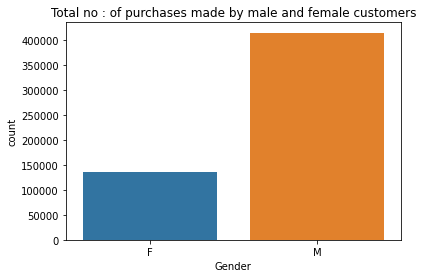

In [ ]:
sns.countplot(df['Gender'])
plt.title("Total no : of purchases made by male and female customers")
plt.show()


Total purchases made by male customers is more than the female customers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


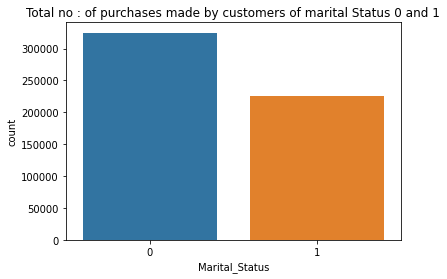

In [ ]:
sns.countplot(df['Marital_Status'])
plt.title("Total no : of purchases made by customers of marital Status 0 and 1")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


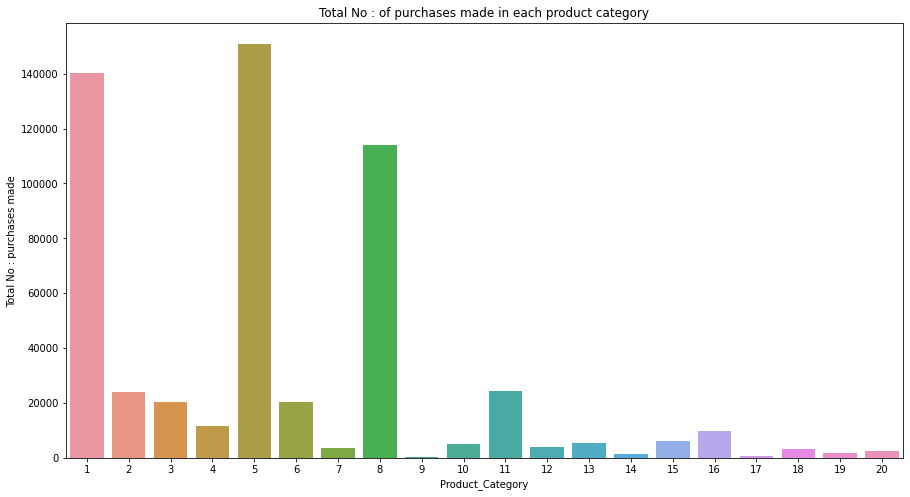

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['Product_Category'])

plt.title("Total No : of purchases made in each product category")
plt.ylabel("Total No : purchases made")
plt.show()


5 is the most selling category followed by 1 and 8

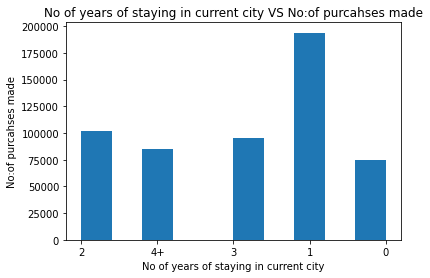

In [ ]:

plt.hist(df['Stay_In_Current_City_Years'])
plt.xlabel("No of years of staying in current city")
plt.ylabel("No:of purcahses made")
plt.title( "No of years of staying in current city VS No:of purcahses made")
plt.show()

From the graph its clear that most purchases were made by customers staying in the current city for 1 year

#1.3.2 Univariate Continuous

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


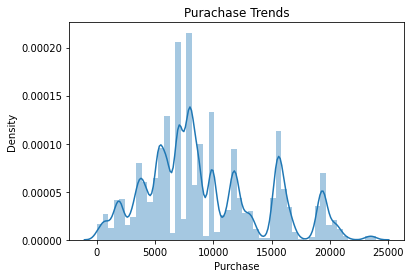

In [ ]:
sns.distplot(df['Purchase'])
plt.title("Purachase Trends")
plt.show()

From the plot its clear that majority of customers make purchase of purchase amount between 6000 and 9000

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


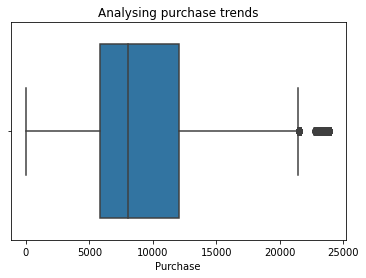

In [ ]:
plt.title("Analysing purchase trends")
sns.boxplot(df['Purchase'])
plt.show()

from the plot its clear that avg purchase amounts is about 9300

#1.3.3 Bivariate Categorical

In [ ]:
temp1=df[['Gender','Marital_Status']]
temp1

,Gender,Marital_Status
0,F,0
1,F,0
2,F,0
3,F,0
4,M,0
...,...,...
550063,M,1
550064,F,0
550065,F,1
550066,F,0


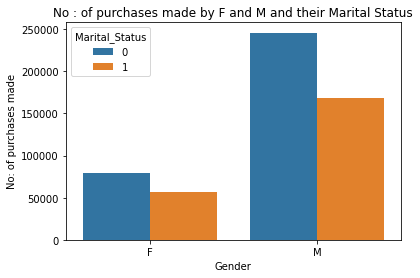

In [ ]:
sns.countplot(x='Gender',data=temp1,hue='Marital_Status')
plt.title("No : of purchases made by F and M and their Marital Status")
plt.ylabel('No: of purchases made')
plt.show()


From the plot its clear that no: of purchases made by customers with marital status 0 is more for both male and female

In [ ]:
temp2=df.groupby('Gender')[['User_ID']].nunique()
temp2=temp2.reset_index()
temp2.columns=['Gender','Customer_no']
temp2

,Gender,Customer_no
0,F,1666
1,M,4225


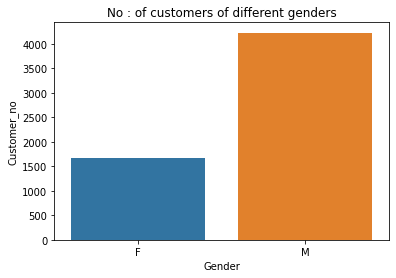

In [ ]:
sns.barplot(x='Gender',y='Customer_no',data=temp2)
plt.title("No : of customers of different genders")
plt.show()

from the plot its clear that number of male customers is more(close to 4000)

In [ ]:
temp3=df.groupby('Age')[['User_ID']].nunique()
temp3=temp3.reset_index()
temp3.columns=['Age','Customer_no']
temp3

,Age,Customer_no
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


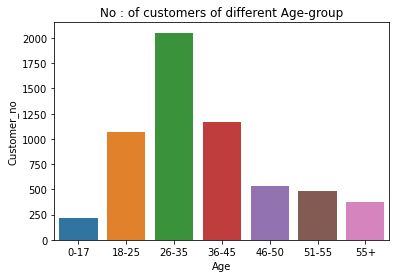

In [ ]:
sns.barplot(x='Age',y='Customer_no',data=temp3)
plt.title("No : of customers of different Age-group")
plt.show()

Majority of customers are in age group 26-35

In [ ]:
temp4=pd.DataFrame(df[['Age']].value_counts())
temp4=temp4.reset_index()
temp4.columns=['Age','Total_purchases']
temp4

,Age,Total_purchases
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


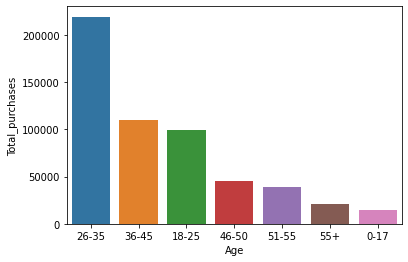

In [ ]:
sns.barplot(data=temp4,x='Age',y='Total_purchases')

Most purchases are made by customers of age group 26-35

In [ ]:
temp5=pd.DataFrame(df['Occupation'].value_counts())
temp5=temp5.reset_index()
temp5.columns=['Occupation','Total_purchase']
temp5

,Occupation,Total_purchase
0,4,72308
1,0,69638
2,7,59133
3,1,47426
4,17,40043
5,20,33562
6,12,31179
7,14,27309
8,2,26588
9,16,25371


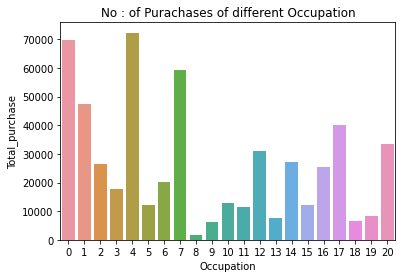

In [ ]:
sns.barplot(x='Occupation',y='Total_purchase',data=temp5)
plt.title("No : of Purachases of different Occupation")
plt.show()

The no:of purchases made is maximumby people of occupation 4

In [ ]:
temp6=df[['Gender','Purchase']]
temp6

,Gender,Purchase
0,F,8370
1,F,15200
2,F,1422
3,F,1057
4,M,7969
...,...,...
550063,M,368
550064,F,371
550065,F,137
550066,F,365


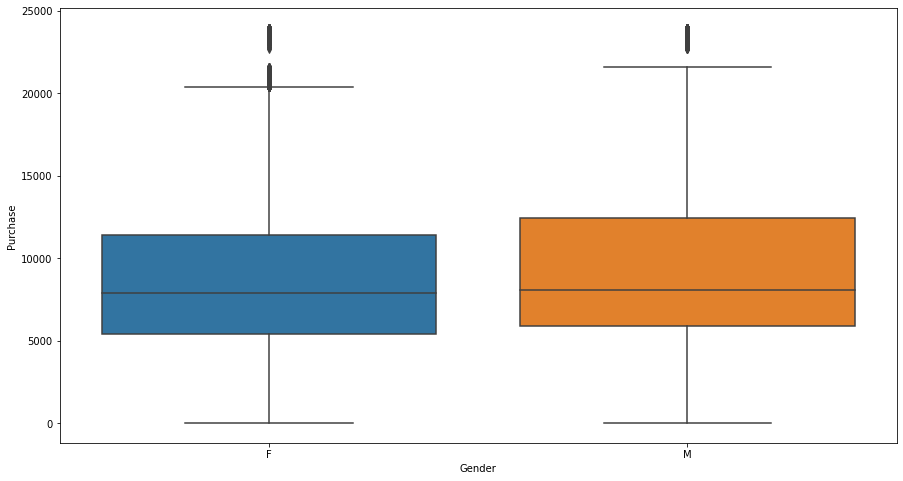

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=temp6,x='Gender',y='Purchase')

from the plot it is clear that the mean purchase amount of male are slightly higher than that of female customers

In [ ]:
temp7=pd.DataFrame(df.groupby(['Gender','Marital_Status'])['User_ID'].nunique())
temp7=temp7.reset_index()
temp7.columns=['Gender','Marital_Status',"Customer_No"]
temp7

,Gender,Marital_Status,Customer_No
0,F,0,947
1,F,1,719
2,M,0,2470
3,M,1,1755


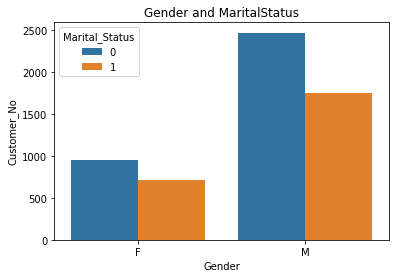

In [ ]:
sns.barplot(data=temp7,x='Gender',y='Customer_No',hue='Marital_Status')
plt.title("Gender and MaritalStatus")
plt.show()

Among both male and female customers,The number of customers with marital status 0 is more.

In [ ]:
temp8=pd.DataFrame(df.groupby(['Gender','Occupation'])['User_ID'].nunique())
temp8=temp8.reset_index()
temp8.columns=['Gender','Occupation','Customer_No']
temp8

,Gender,Occupation,Customer_No
0,F,0,226
1,F,1,203
2,F,2,88
3,F,3,98
4,F,4,228
5,F,5,31
6,F,6,99
7,F,7,137
8,F,8,3
9,F,9,85


Text(0.5, 1.0, 'Gender and Occupation')

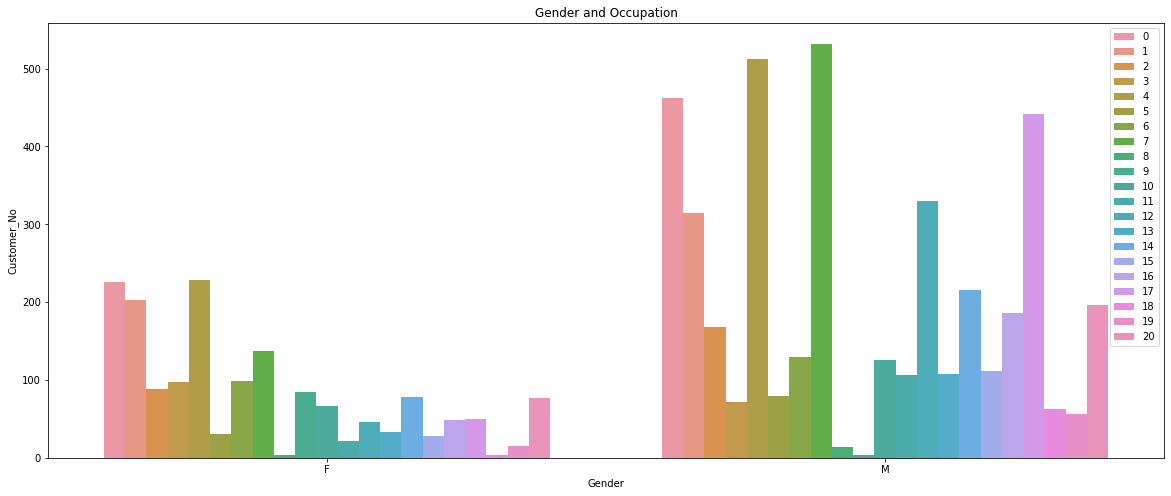

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=temp8,x='Gender',y='Customer_No',hue='Occupation')
plt.legend(loc='upper right')
plt.title("Gender and Occupation")

Among male customers the occupation of majority customers are 8

Among female customers the occupation of majority customers are 5

In [ ]:
temp9=pd.DataFrame(df.groupby(['Gender','Product_Category'])['User_ID'].nunique())
temp9=temp9.reset_index()
temp9.columns=['Gender','Product_Category','Customer_No']
temp9

,Gender,Product_Category,Customer_No
0,F,1,1593
1,F,2,1146
2,F,3,1093
3,F,4,966
4,F,5,1638
5,F,6,1090
6,F,7,351
7,F,8,1614
8,F,9,70
9,F,10,513


Text(0.5, 1.0, 'Gender and Product_Category')

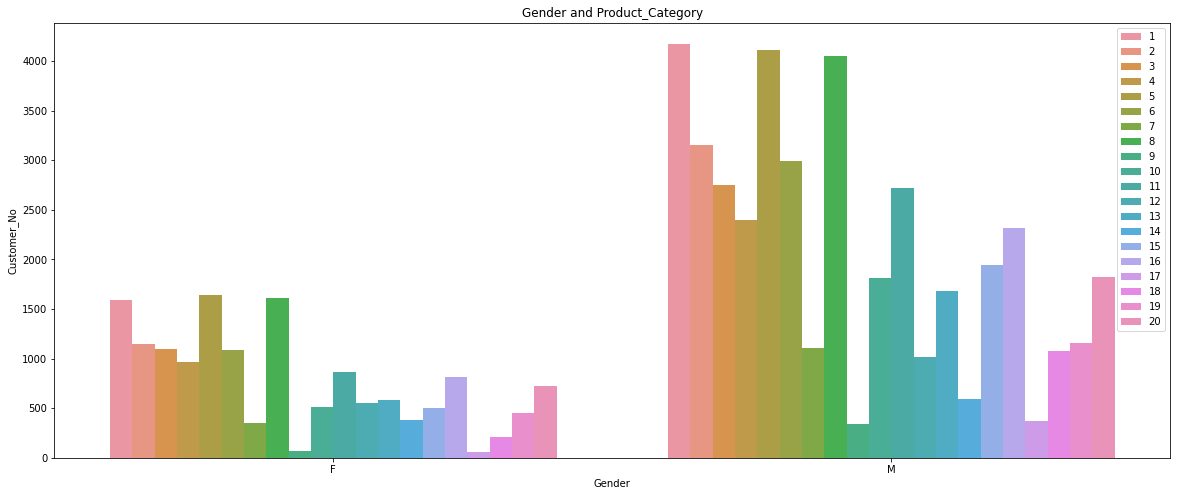

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=temp9,x='Gender',y='Customer_No',hue='Product_Category')
plt.legend(loc='upper right')
plt.title("Gender and Product_Category")

Female prefer items more of product category 5

Male prefer items more of product category 1

City based analysis

#1.3.4 Bivariate continuous

In [ ]:
temp10=pd.DataFrame(df.groupby(['City_Category'])['User_ID'].nunique())
temp10=temp10.reset_index()
temp10.columns=['City_Category','Customer_No']
temp10

,City_Category,Customer_No
0,A,1045
1,B,1707
2,C,3139


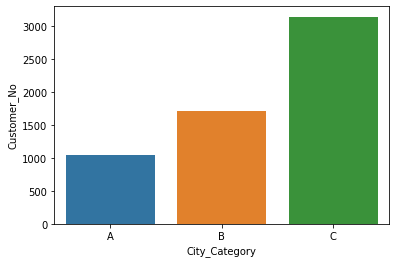

In [ ]:
sns.barplot(data=temp10,x='City_Category',y='Customer_No')

More no of customer are in city category C 

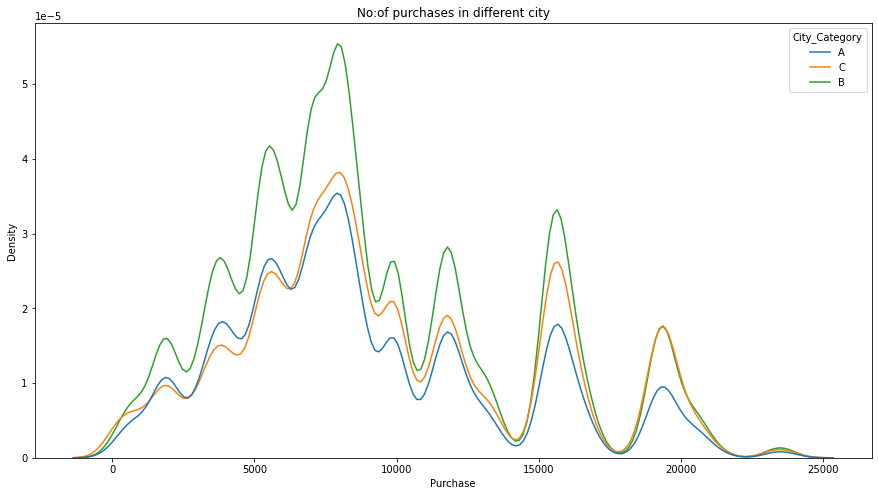

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df,x='Purchase',hue='City_Category')
plt.title("No:of purchases in different city")
plt.show()

people in the city category B make more no:of purchases

#1.5 Correlation analysis

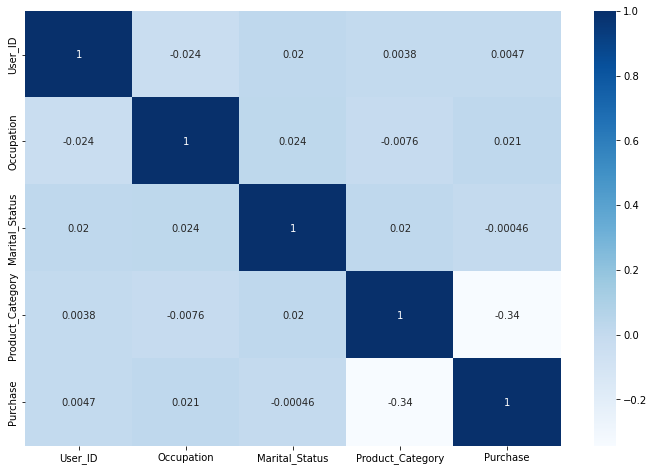

In [ ]:
#Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap= "Blues", annot=True)

There is not much correation between different attributes

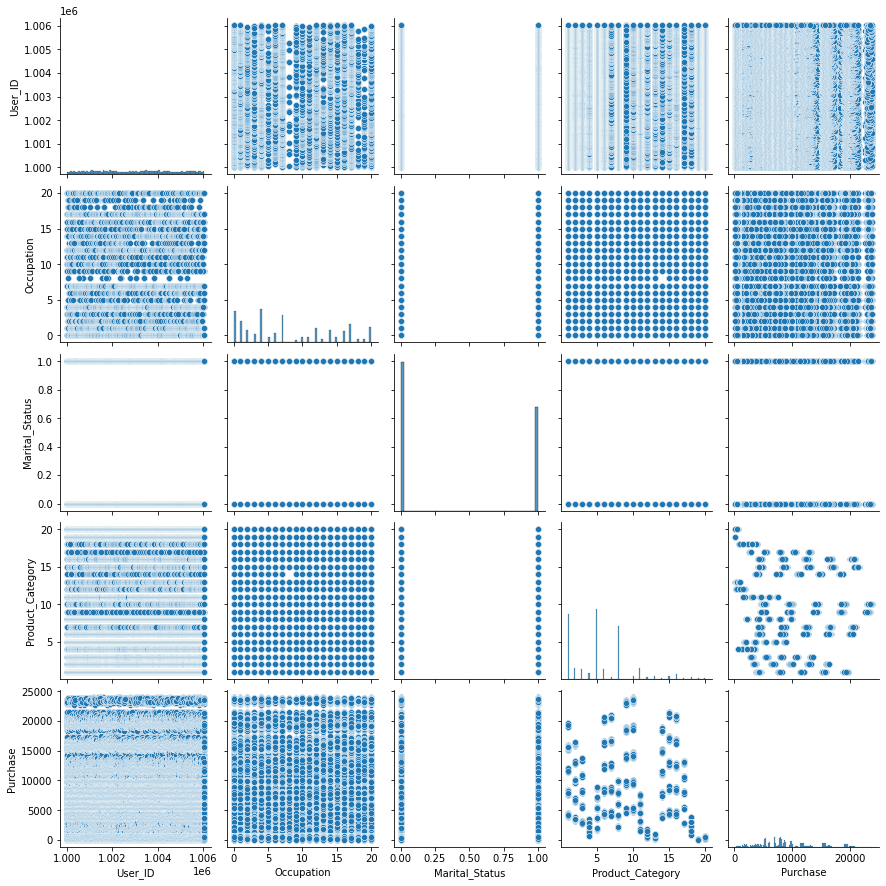

In [ ]:
#pair plot 
sns.pairplot(data=df)
plt.show()

There is not much correlation between different attributes

# 2 Missing Value & Outlier Detection

The original dataset had no missing values nor it had any duplicates

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#Outlier detection

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


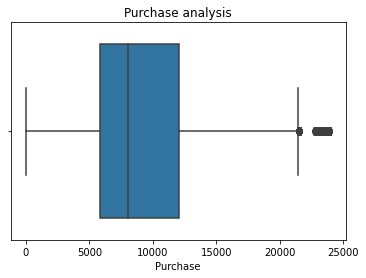

In [ ]:
sns.boxplot(df['Purchase'])
plt.title("Purchase analysis")
plt.show()

The mean amount of cutomers are close to 10000.But from the graph we can see some purchase amount greater than 22000 which are outliers

#3 Business Insights based on Non- Graphical and Visual Analysis

#3.1 Comments on the range of attributes

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:

df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
print('Minimum purchase amount:',df['Purchase'].min())
print('Maximum purchase amount:',df['Purchase'].max())

Minimum purchase amount: 12
Maximum purchase amount: 23961


Range of purchase amounts vary from 12 to 23961

In [ ]:
print(f"product category varies between {df['Product_Category'].min()} and {df['Product_Category'].max()}")


product category varies between 1 and 20


In [ ]:
print(f"Marital status are either {df['Marital_Status'].min()} or {df['Marital_Status'].max()}")

Marital status are either 0 or 1


In [ ]:
print(f"Gender are either {df['Gender'].min()} or {df['Gender'].max()}")

Gender are either F or M


In [ ]:
print(f"product id varies between {df['Product_ID'].min()} and {df['Product_ID'].max()}")

product id varies between P00000142 and P0099942


In [ ]:
print(f"City_category varies between {df['City_Category'].min()} and {df['City_Category'].max()}")

City_category varies between A and C


In [ ]:
print(f"Stay in current city varies between {df['Stay_In_Current_City_Years'].min()} and {df['Stay_In_Current_City_Years'].max()}")

Stay in current city varies between 0 and 4+


In [ ]:
print(f"Occupation varies between {df['Occupation'].min()} and {df['Occupation'].max()}")

Occupation varies between 0 and 20


In [ ]:
print(f"User id varies between {df['User_ID'].min()} and {df['User_ID'].max()}")

User id varies between 1000001 and 1006040


# 3.2 Comments on the distribution of the variables and relationship between them

There are 10 different variables in the original dataset. They are 'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category','Purchase'

The gender is either M or F

The marital Status is either 0 or 1

The occupation are 10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,5, 14, 13,  6

The stay in currernt city years are '2', '4+', '3', '1', '0'

The different product category are  3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17, 9, 20, 19

The different age group are '0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'

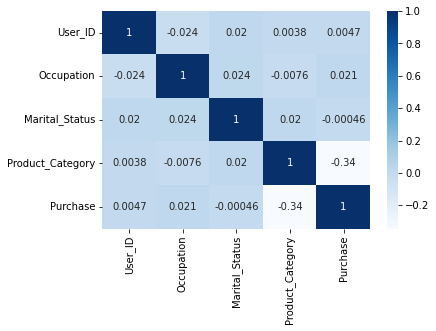

In [ ]:
sns.heatmap(data=df.corr(),cmap='Blues',annot=True)

from the heatmap the relationships among different vcariables are clear

All the variable do not have much relation with each other

the relationship values are either very small positve or negative.So it does not have much relevance

#3.3 Comments for each univariate and bivariate plot

Comments of each plot is given with the graph itself

#4 Answering questions 

#4.1 Are women spending more money per transaction than men? Why or Why not? 

In [ ]:
df_male=df.loc[df['Gender']=='M']
df_female=df.loc[df['Gender']=='F']

In [ ]:
print('Averge amount spend by male customers per transaction=',df_male['Purchase'].mean())
print('Averge amount spend by female customers per transaction=',df_female['Purchase'].mean())
print('Maximum amount spend by male customers in  transaction=',df_male['Purchase'].max())
print('Maximum amount spend by female customers in transaction=',df_female['Purchase'].max())
print('Minimum amount spend by male customers in transaction=',df_male['Purchase'].min())
print('Minimum amount spend by female customers in transaction=',df_female['Purchase'].min())

Averge amount spend by male customers per transaction= 9437.526040472265
Averge amount spend by female customers per transaction= 8734.565765155476
Maximum amount spend by male customers in  transaction= 23961
Maximum amount spend by female customers in transaction= 23959
Minimum amount spend by male customers in transaction= 12
Minimum amount spend by female customers in transaction= 12


We can conclude that women are not spending more money per transaction than men from the above analysis.




In [ ]:
df.groupby(['Gender','Stay_In_Current_City_Years'])['User_ID'].nunique()

Gender  Stay_In_Current_City_Years
F       0                              214
        1                              604
        2                              328
        3                              286
        4+                             234
M       0                              558
        1                             1482
        2                              817
        3                              693
        4+                             675
Name: User_ID, dtype: int64

Reason for this:

from the above analysis its clear that the no :of male years staying in current city for more than 3 years is very large compared to females of the same

no: of males staying in the current city for 3 or more years=693+675=1368

no: of females staying in the current city for 3 or more years=286+234=520


As a result less no:of females might be  interested in buying things that are useful for them for more than 3 years which might be more expensive also. 


Since more males are staying in the current city for more than 3 years .They might be spending more money for expensive items that are usefulm to them for more than 3 years

# 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [ ]:
temp11=df_male.groupby('User_ID')['Purchase'].mean()
temp11=temp11.reset_index()
temp11

,User_ID,Purchase
0,1000002,10525.610390
1,1000003,11780.517241
2,1000004,14747.714286
3,1000005,7745.292453
4,1000007,13804.000000
...,...,...
4220,1006030,12497.644068
4221,1006032,9404.745455
4222,1006033,13940.083333
4223,1006034,16423.833333


In [ ]:
temp12=df_female.groupby('User_ID')['Purchase'].mean()
temp12=temp12.reset_index()
temp12

,User_ID,Purchase
0,1000001,9545.514286
1,1000006,8083.617021
2,1000010,9728.744395
3,1000011,7957.471429
4,1000016,6840.454545
...,...,...
1661,1006035,6293.717105
1662,1006036,8007.894942
1663,1006037,9176.540984
1664,1006038,7502.833333


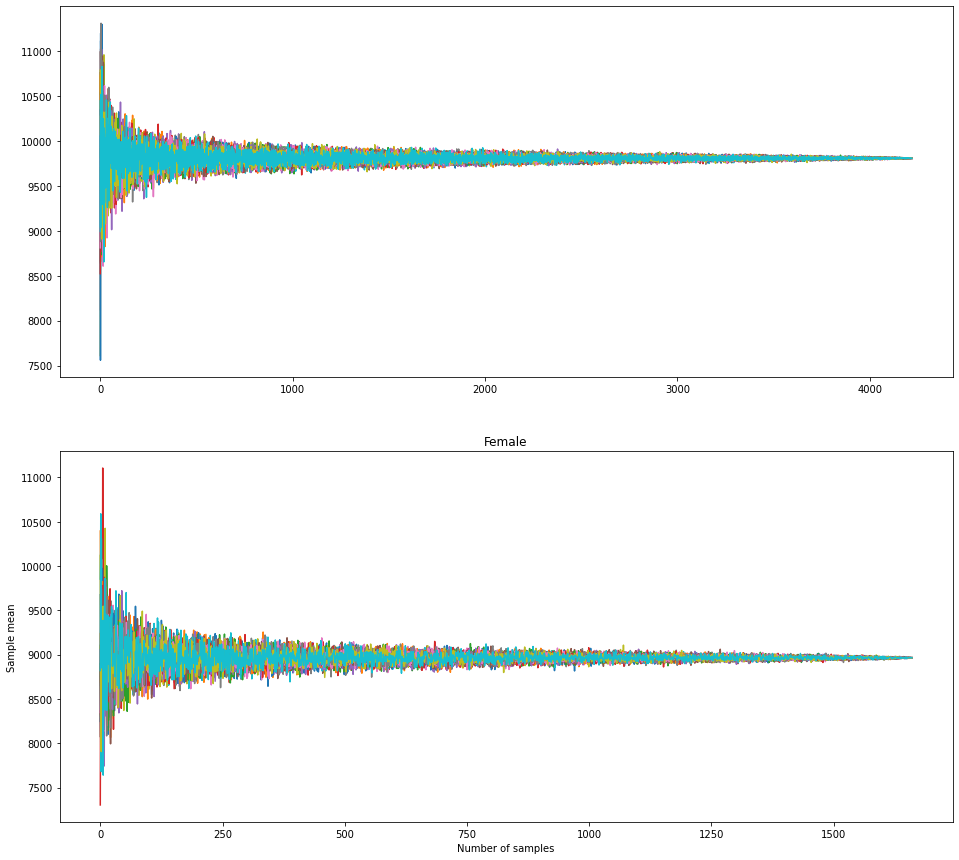

In [ ]:
fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(16,15))
sample_mean_trend=[]
for person in range(20):
  for num_samples in range(5,len(temp11)):
    sample=temp11['Purchase'].sample(num_samples)
    sample_mean=np.mean(sample)
    sample_mean_trend.append(sample_mean)
  axis[0].plot(sample_mean_trend)
  sample_mean_trend=[]
plt.title("Male")
plt.xlabel("Number of samples")
plt.ylabel('Sample mean')

sample_mean_trend=[]
for person in range(20):
  for num_samples in range(5,len(temp12)):
    sample=temp12['Purchase'].sample(num_samples)
    sample_mean=np.mean(sample)
    sample_mean_trend.append(sample_mean)
  axis[1].plot(sample_mean_trend)
  sample_mean_trend=[]
plt.title('Female')
plt.xlabel("Number of samples")
plt.ylabel('Sample mean')

plt.show()

Since the fluctuations are very small from 1000 samples,for measuring confidence intervals of 50 million male and 50 million females ,take only 200 samples and 10000 people

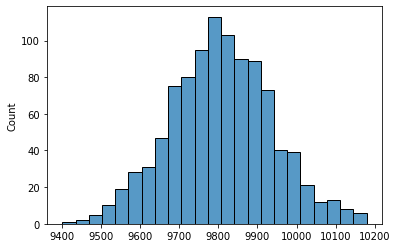

In [ ]:
num_samples = 200
num_people = 1000
sample_means = []
for person in range(num_people):
    sample = temp11["Purchase"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)


In [ ]:
from scipy.stats import norm
left_z = round(norm.ppf(0.025), 2)
right_z = round(norm.ppf(0.975), 2)

print(f"Range of z values: [{left_z}, {right_z}]")

Range of z values: [-1.96, 1.96]


In [ ]:
pop_mu = temp11["Purchase"].mean()
pop_sigma = temp11["Purchase"].std()

In [ ]:
obs_mean = sample_means[-1]

left = left_z * pop_sigma/np.sqrt(num_samples) + pop_mu
right = right_z * pop_sigma/np.sqrt(num_samples) + pop_mu

print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left}, {right}] for male customers ")

With 95% confidence interval, we can say that 9932.000880943808 lies between [9542.654503886302, 10071.080544566956] for male customers 


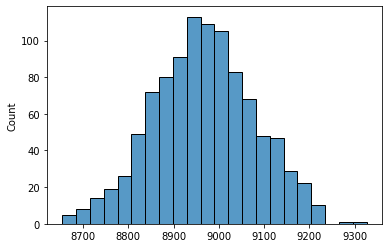

In [ ]:
num_samples = 200
num_people = 1000
sample_means = []
for person in range(num_people):
    sample = temp12["Purchase"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)

In [ ]:
from scipy.stats import norm
left_z = round(norm.ppf(0.025), 2)
right_z = round(norm.ppf(0.975), 2)

print(f"Range of z values: [{left_z}, {right_z}]")

Range of z values: [-1.96, 1.96]


In [ ]:
pop_mu = temp12["Purchase"].mean()
pop_sigma = temp12["Purchase"].std()

In [ ]:
obs_mean = sample_means[-1]

left = left_z * pop_sigma/np.sqrt(num_samples) + pop_mu
right = right_z * pop_sigma/np.sqrt(num_samples) + pop_mu

print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left}, {right}] for female customers ")

With 95% confidence interval, we can say that 9028.55787296115 lies between [8728.812214801872, 9201.584713071048] for female customers 


#4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

No ,confidence intervals of average male and female spending are not overlapping.So it can be concluded that for 50 million males the expense spend will be more as compared to females.So walmart can make schemes to attract male customers more at the same time to improve expenses among female some new schemes can be made 

#4.4 Results when the same activity is performed for Married vs Unmarried

In [ ]:
df_0=df[df['Marital_Status']==0]
df_1=df[df['Marital_Status']==1]

In [ ]:
#marital status 0
temp13=df_0.groupby('User_ID')['Purchase'].mean()
temp13=temp13.reset_index()
temp13

,User_ID,Purchase
0,1000001,9545.514286
1,1000002,10525.610390
2,1000003,11780.517241
3,1000006,8083.617021
4,1000009,10243.086207
...,...,...
3412,1006034,16423.833333
3413,1006035,6293.717105
3414,1006037,9176.540984
3415,1006038,7502.833333


In [ ]:
#marital status 1
temp14=df_1.groupby('User_ID')['Purchase'].mean()
temp14=temp14.reset_index()
temp14

,User_ID,Purchase
0,1000004,14747.714286
1,1000005,7745.292453
2,1000007,13804.000000
3,1000008,10345.363636
4,1000010,9728.744395
...,...,...
2469,1006029,9260.941176
2470,1006030,12497.644068
2471,1006033,13940.083333
2472,1006036,8007.894942


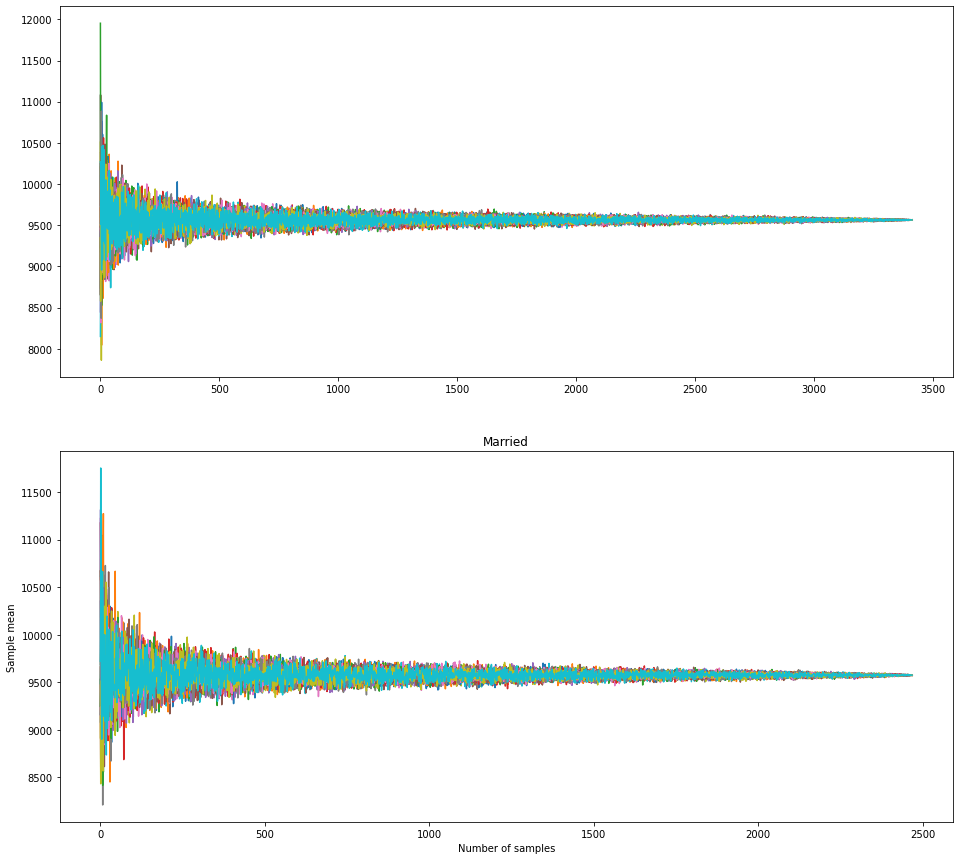

In [ ]:
fig,axis=plt.subplots(nrows=2,ncols=1,figsize=(16,15))
sample_mean_trend=[]
for person in range(20):
  for num_samples in range(5,len(temp13)):
    sample=temp13['Purchase'].sample(num_samples)
    sample_mean=np.mean(sample)
    sample_mean_trend.append(sample_mean)
  axis[0].plot(sample_mean_trend)
  sample_mean_trend=[]
plt.title('Unmarried')
plt.xlabel("Number of samples")
plt.ylabel('Sample mean')

sample_mean_trend=[]
for person in range(20):
  for num_samples in range(5,len(temp14)):
    sample=temp14['Purchase'].sample(num_samples)
    sample_mean=np.mean(sample)
    sample_mean_trend.append(sample_mean)
  axis[1].plot(sample_mean_trend)
  sample_mean_trend=[]
plt.title('Married')
plt.xlabel("Number of samples")
plt.ylabel('Sample mean')

plt.show()

Since the fluctuations are very small from 1000 samples,for measuring confidence intervals of 50 million male and 50 million females ,take only 200 samples and 10000 people

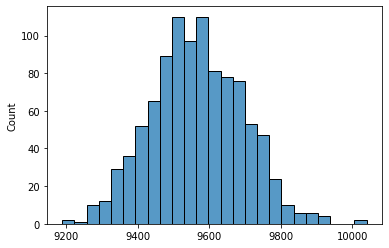

In [ ]:
num_samples = 200
num_people = 1000
sample_means = []
for person in range(num_people):
    sample = temp13["Purchase"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)

In [ ]:
from scipy.stats import norm
left_z = round(norm.ppf(0.025), 2)
right_z = round(norm.ppf(0.975), 2)

print(f"Range of z values: [{left_z}, {right_z}]")

Range of z values: [-1.96, 1.96]


In [ ]:
pop_mu = temp13["Purchase"].mean()
pop_sigma = temp13["Purchase"].std()

In [ ]:
obs_mean = sample_means[-1]

left = left_z * pop_sigma/np.sqrt(num_samples) + pop_mu
right = right_z * pop_sigma/np.sqrt(num_samples) + pop_mu

print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left}, {right}] for marital status=0 customers ")

With 95% confidence interval, we can say that 9698.335782817107 lies between [9304.222164132354, 9824.592119140178] for marital status=0 customers 


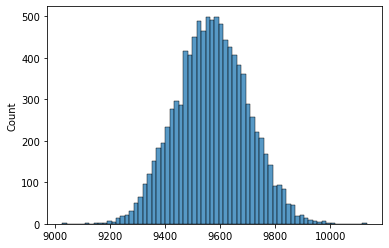

In [ ]:
num_samples = 200
num_people = 10000
sample_means = []
for person in range(num_people):
    sample = temp14["Purchase"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means)

In [ ]:
pop_mu = temp14["Purchase"].mean()
pop_sigma = temp14["Purchase"].std()

In [ ]:
obs_mean = sample_means[-1]

left = left_z * pop_sigma/np.sqrt(num_samples) + pop_mu
right = right_z * pop_sigma/np.sqrt(num_samples) + pop_mu

print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left}, {right}] for marital status=1 customers ")

With 95% confidence interval, we can say that 9826.444475508824 lies between [9310.537107269345, 9839.387490794143] for marital status=1 customers 


The confidence intervals for  married and unmarried customers are overlapping.So a same scheme can be made for both married and unmarried customers

#4.4 Results when the same activity is performed for Age

In [ ]:
temp15=df.groupby(['User_ID','Age'])[['Purchase']].mean()
temp15=temp15.reset_index()
temp15

,User_ID,Age,Purchase
0,1000001,0-17,9545.514286
1,1000002,55+,10525.610390
2,1000003,26-35,11780.517241
3,1000004,46-50,14747.714286
4,1000005,26-35,7745.292453
...,...,...,...
5886,1006036,26-35,8007.894942
5887,1006037,46-50,9176.540984
5888,1006038,55+,7502.833333
5889,1006039,46-50,7977.283784


In [ ]:
temp15.groupby('Age')['Purchase'].mean()

Age
0-17     8986.318305
18-25    9515.636521
26-35    9607.126898
36-45    9686.463039
46-50    9565.974310
51-55    9630.474319
55+      9407.200822
Name: Purchase, dtype: float64

Calculation of confidence intervals

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#bootstrapping for every age group and store as dictionary

age_sample_size=20
num_repetitions=1000

all_means={}

age_intervals=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

for age_interval in age_intervals:
  all_means[age_interval]=[]

for age_interval in age_intervals:
  for _ in range(num_repetitions):
    mean=temp15[temp15['Age']==age_interval].sample(age_sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)

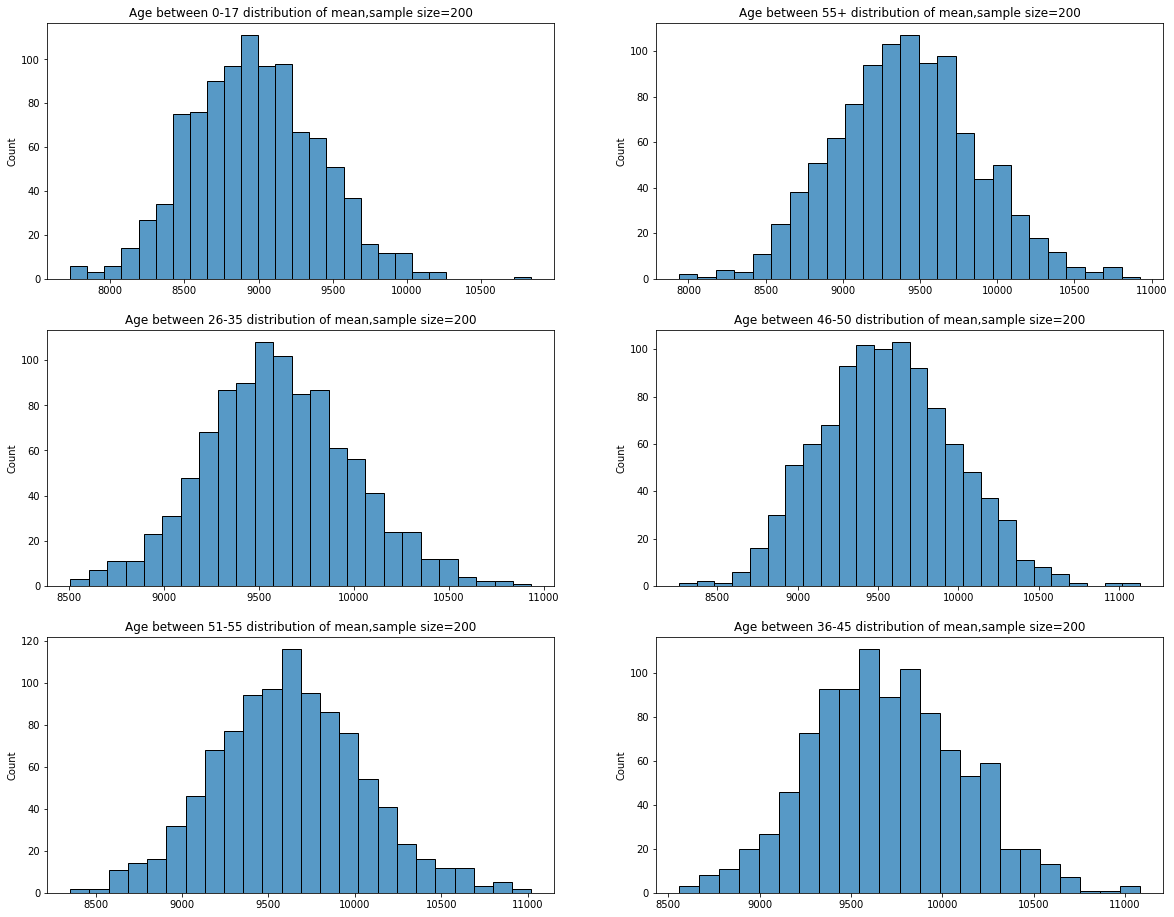

In [ ]:
#ploting histogram for all age group


fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(20,16))
count=0 
age_intervals=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
for i in range(3):
  for j in range(2):
    sns.histplot(all_means[age_intervals[count]],ax=axis[i,j])
    axis[i,j].set_title(f'Age between {age_intervals[count]} distribution of mean,sample size=200')
    count+=1

In [ ]:
for i in all_means:
  sigma=np.std(temp15[temp15['Age']==i]['Purchase'])
  left=np.round(-1.96 * (sigma/np.sqrt(age_sample_size))+ all_means[i][-1],2)
  right=np.round(1.96 * (sigma/np.sqrt(age_sample_size))+ all_means[i][-1],2)
  print(f" for age {i} confidence interval of mean : {left}, {right}")

 for age 0-17 confidence interval of mean : 7916.48, 9605.67
 for age 55+ confidence interval of mean : 9401.92, 11156.15
 for age 26-35 confidence interval of mean : 8895.61, 10494.52
 for age 46-50 confidence interval of mean : 8177.84, 9788.98
 for age 51-55 confidence interval of mean : 8793.18, 10476.56
 for age 36-45 confidence interval of mean : 8344.2, 9965.79
 for age 18-25 confidence interval of mean : 8112.47, 9858.4


#5 Final Insights

 Illustrate the insights based on exploration and CLT

1) Majority customers are in the age group 26-35,More purchases are also made by customers of this age group


2)Male customers are more in number than the female customers

3)For both  female and male customers the unmarried customers are more

4)Among male customers the occupation of majority customers are 8

and Among female customers the occupation of majority customers are 5

5)Female prefer items more of product category 5
and Male prefer items more of product category 1

6)The no:of purchases made is maximumby people of occupation 4

7) most no: purchases were made by customers staying in the current city for 1 year

8)for age 0-17 confidence interval of mean : 8099.67, 9788.86
 
 for age 55+ confidence interval of mean : 9036.71, 10790.94
 
 for age 26-35 confidence interval of mean : 9130.0, 10728.91
 
 for age 46-50 confidence interval of mean : 8627.83, 10238.97
 
 for age 51-55 confidence interval of mean : 8353.24, 10036.63
 
 for age 36-45 confidence interval of mean : 9229.55, 10851.14
 
 for age 18-25 confidence interval of mean : 9574.32, 11320.25

9)With 95% confidence interval, we can say that 9705.45432674589 lies between [9310.537107269345, 9839.387490794143] for marital status=1 customers 

10)With 95% confidence interval, we can say that 9486.076513021537 lies between [9304.222164132354, 9824.592119140178] for marital status=0 customers 

11)With 95% confidence interval, we can say that 9018.891219115472 lies between [8728.812214801872, 9201.584713071048] for female customers 

12) With 95% confidence interval, we can say that 9744.73692525983 lies between [9542.654503886302, 10071.080544566956] for male customers 



#6 Recommendations

1)Majority customers lies in the age group of 26-35 and most purchases are made by these  customers. So while launching new products ,They should be considered as the primary target.

2)Female prefer items more of product category 5 and Male prefer items more of product category 1.So for attracting more males new products of category 1 can be launched and for females more products of category 5 can be launched

3)most number of customers are in city C.So more outlets can be opened here

4)The no:of purchases made is maximumby people of occupation 4.so combining this result with age group of 26-35,Exclusive prodcts can be made for people of occupation 4 and having age between 26 and 35

5) most no: purchases were made by customers staying in the current city for 1 year.so products that are usable for less than 1 year can be made available more in numbers.

6)There are some customers which spend a lot more as compared to majority.These outlier customers can be considered premium customers and can be given special priority

7)Since confidence intervals of average male and female spending are not overlapping.So it can be concluded that for 50 million males the expense spend will be more as compared to females.So walmart can make schemes to attract male customers more at the same time to improve expenses among female some new or separat  schemes can be made